In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import glob
import IPython.display as ipd
import random
%pylab inline

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


C:\Users\Acer\.conda\envs\tensorflow\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
metadata=pd.read_csv('audio/metadata_new/final_metadata/combined_csv_new - Copy_v1.csv')
df = pd.read_csv('audio/metadata_new/final_metadata/combined_csv_new - Copy_v1.csv')
df.head()

,name_of_audio,pronunciation_score_percentage,pronunciation_percentage,fold
0,E2_P1.wav,85.00,85,1
1,E3_P1.wav,95.07,95,1
2,E2_P10.wav,95.05,95,10
3,E2_P11.wav,95.06,95,11
4,E1_P12.wav,95.05,95,12


In [3]:
# ipd.Audio('audio/rec/fold1/S1_P15_F.wav')
data, sampling_rate = librosa.load('audio/rec - Copy/S1_P1_F.wav')

In [4]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.00143572,
       -0.00139209, -0.00141668], dtype=float32)

In [5]:
sampling_rate

22050

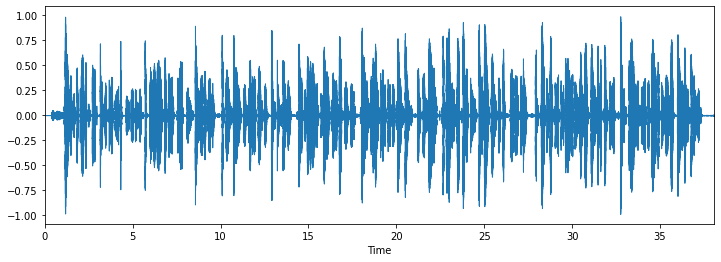

In [6]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

Pronunciation_percentage: 90


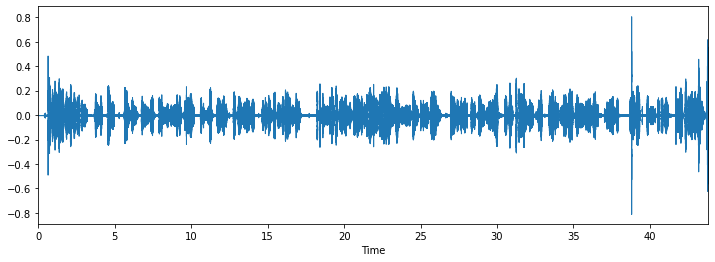

In [7]:
index = random.choice(df.index)

print('Pronunciation_percentage:', df['pronunciation_percentage'][index])
data, sampling_rate = librosa.load('audio/rec - Copy/'+str(df['name_of_audio'][index]))

plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

<AxesSubplot:xlabel='pronunciation_percentage', ylabel='count'>

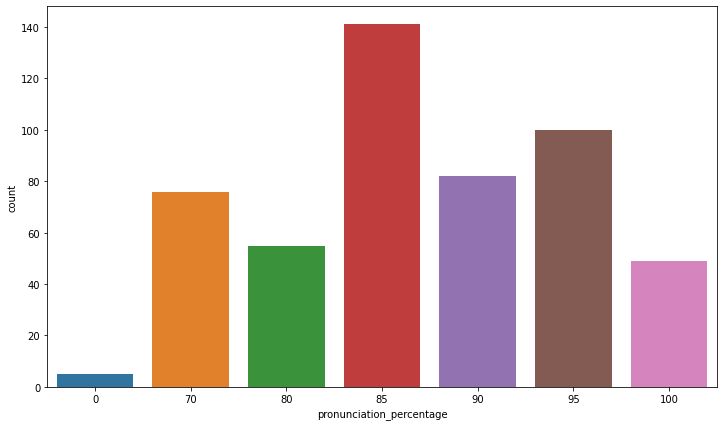

In [8]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.countplot(df['pronunciation_percentage'])

In [9]:
# Input split

import os

def parser(row):
  # path of the file
  file_name = os.path.join('audio/rec - Copy/', str(row.name_of_audio))
  # load the audio file
  x, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
  # extract features from the data
  mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=40).T, axis=0)

  feature = mfccs
  label = row.pronunciation_percentage

  return [feature, label]

In [10]:
df.apply(parser, axis=1)
data.columns = ['feature','label']
# extracted_features_df.head()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [11]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [12]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join('audio/rec - Copy/', str(row.name_of_audio))
    final_class_labels=row["pronunciation_percentage"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

508it [05:45,  1.47it/s]


In [13]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-364.22656, 133.04326, -24.707306, 8.948652, ...",85
1,"[-379.86017, 119.4718, -3.163177, 25.166592, -...",95
2,"[-353.5439, 145.00945, -31.72263, 8.87748, 17....",95
3,"[-352.76407, 136.59334, -31.263487, 8.083315, ...",95
4,"[-427.30124, 129.09596, -3.9694078, 8.760965, ...",95


In [14]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [15]:
X.shape

(508, 40)

In [16]:
y

array([ 85,  95,  95,  95,  95,  90,  85,  95,  95,  95,  95,  95,  95,
        95,  85,  95,  95, 100,  95,  90, 100,  70,  95,  70,  85,  70,
        80,  70,  90,  90, 100,  95,  85,  70,  80,  95,  70,  95,  70,
        85,  85,  85,  90,  85,  80,  85,  90,  85,  70,  70, 100,  95,
        70,  95,  85, 100,  95,  80,  90,  85,  90, 100,  95,  85, 100,
        70,  95,  95, 100,  70,  90,  70,  85,  85,  85,  80,  95,  85,
        85,  85,  85,  95,  95,  70,  95,  95, 100,  85,  85,  85,  90,
        95,  95,  85, 100,  80,  95,  90,  90,  80,  85,  70,  70,  85,
        85,  70,  90,  85,  85,  85,  70,  95, 100,  80,  95,  85, 100,
        95,  80,  70,  90, 100,  95,  85, 100,  95,  85,  90,  80,  95,
        70,  80,  85,  70,  80, 100,  70,  90,  90,  90,  90,  95,  70,
        95,  85,  95,  95,  85,  85,  85, 100,  90,  95,  85,  90,  90,
        95,  70, 100,  80,  85,   0,  80,  85,  85,  85, 100,  85,  85,
        95,  85, 100,  95,  70,  95,  70, 100,  90, 100,  90,  8

In [17]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [18]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
X_train

array([[-384.79132  ,  126.83416  ,   22.044748 , ...,    3.6588137,
           4.157282 ,    4.989248 ],
       [-332.5388   ,   92.562675 ,   -3.9492354, ...,    5.115012 ,
           4.4112234,    2.8012795],
       [-315.8667   ,  120.47542  ,   20.410995 , ...,   -2.1051085,
          -1.2823454,   -1.5356203],
       ...,
       [-392.28574  ,   88.3984   ,   -4.571233 , ...,   -1.4070433,
          -2.783642 ,   -1.0058346],
       [-393.10715  ,  157.4563   ,  -13.183333 , ...,    4.2225337,
           3.0959253,    2.988069 ],
       [-339.63928  ,  100.59851  ,   -1.3436158, ...,   -1.5343856,
          -0.6541061,   -2.4956307]], dtype=float32)

In [20]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
X_train.shape

(406, 40)

In [22]:
X_test.shape

(102, 40)

In [23]:
y_train.shape

(406, 7)

In [24]:
y_test.shape

(102, 7)

In [25]:
###### -------- Model Creation -------- ######

In [26]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [28]:
### No of classes
num_labels=y.shape[1]

In [29]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [31]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [32]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
12/13 [==========================>...] - ETA: 0s - loss: 67.8951 - accuracy: 0.1667
Epoch 00001: val_loss improved from inf to 18.39289, saving model to saved_models\audio_classification.hdf5
13/13 [==============================] - 1s 51ms/step - loss: 66.6813 - accuracy: 0.1724 - val_loss: 18.3929 - val_accuracy: 0.2941
Epoch 2/200
 1/13 [=>............................] - ETA: 0s - loss: 46.2797 - accuracy: 0.2500
Epoch 00002: val_loss improved from 18.39289 to 6.43008, saving model to saved_models\audio_classification.hdf5
13/13 [==============================] - 0s 3ms/step - loss: 44.2443 - accuracy: 0.1724 - val_loss: 6.4301 - val_accuracy: 0.0490
Epoch 3/200
 1/13 [=>............................] - ETA: 0s - loss: 31.0882 - accuracy: 0.1875
Epoch 00003: val_loss improved from 6.43008 to 2.88641, saving model to saved_models\audio_classification.hdf5
13/13 [==============================] - 0s 3ms/step - loss: 28.1105 - accuracy: 0.1773 - val_loss: 2.8864 - val_accura

In [33]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1]*100)

31.372550129890442


In [34]:
X_test[1]

array([-3.3424139e+02,  1.1067206e+02, -6.6630416e+00,  4.1293573e+00,
       -1.1308483e+01, -1.0980946e+01, -1.5250362e+01,  1.9236928e+00,
       -1.4809805e+01,  2.3802032e-01, -7.7702599e+00,  3.6280439e+00,
       -5.6303148e+00, -6.6174512e+00, -7.5932426e+00, -5.3561540e+00,
       -2.5885587e+00, -5.4182224e+00, -5.7990346e+00, -5.9867935e+00,
       -1.1707730e+00, -2.6819625e+00, -3.1655645e-01,  2.5990316e-01,
       -9.8999280e-01,  5.7512655e+00, -1.5841848e+00,  4.2109928e-01,
        1.8964884e+00,  3.1722341e+00,  2.6149845e+00,  5.7462988e+00,
        2.8583210e+00,  1.4889371e+00,  3.4892721e+00, -8.1730686e-02,
       -3.9798820e-01,  8.0889344e-01, -1.4317317e+00, -6.2499964e-01],
      dtype=float32)

In [35]:
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 5,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [36]:
# Testing Some Test Audio Data

In [37]:
filename="audio/rec - Copy/S74_P8_F.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-4.76481781e+02  9.86589432e+01  3.97883072e+01  2.61166458e+01
  7.30333996e+00  6.95043468e+00 -1.10349741e+01 -7.64988184e+00
 -1.37772455e+01 -1.02682123e+01 -7.88985634e+00 -3.89755130e+00
 -1.29185200e+01 -2.71842241e-01 -1.62036247e+01 -1.23942814e+01
  3.46540880e+00 -5.26274061e+00 -8.81423187e+00 -6.99449825e+00
 -5.41515017e+00 -7.94874072e-01 -4.40009165e+00 -1.94633842e+00
 -1.54539597e+00 -4.07005787e+00  2.80071235e+00  8.47915232e-01
 -1.71305466e+00  2.48699951e+00  1.82406878e+00 -3.58970785e+00
  6.77728713e-01  7.78714478e-01  1.26747656e+00  1.19188082e+00
  1.57236207e+00  2.39441228e+00  6.22204542e-01 -1.31818235e-01]
[[-4.76481781e+02  9.86589432e+01  3.97883072e+01  2.61166458e+01
   7.30333996e+00  6.95043468e+00 -1.10349741e+01 -7.64988184e+00
  -1.37772455e+01 -1.02682123e+01 -7.88985634e+00 -3.89755130e+00
  -1.29185200e+01 -2.71842241e-01 -1.62036247e+01 -1.23942814e+01
   3.46540880e+00 -5.26274061e+00 -8.81423187e+00 -6.99449825e+00
  -5.41515017e+00 -

array([85])

In [38]:
print(prediction_class)

[85]
